### Extinction probabilities based on $ \alpha $

This is based on the notebook `Charts_LloydSmithetal.ipynb`

However, we don't know $ R_0 $, while we do know $ k $. So, generate charts for the probabilities of extinction based on possible ranges of $ R_0 $, using the offspring distribution's sample mean $ m $. Use the result that $ R_0 = \alpha m $, where $ \alpha \in [0,1] $.



In [1]:
import matplotlib.pyplot as plt

font = {'size'   : 14}
plt.rc('font', **font)
plt.rcParams['text.usetex'] = True

In [2]:
from numerical_approximate_p import generate_for_k, g

def plot_figure(alpha_linspace, alpha_threshold, numerical_extinction_probability, year, tick_species, host_species):
    _, ax = plt.subplots(nrows=1)
    ax.plot(alpha_linspace, numerical_extinction_probability)
    ax.vlines(alpha_threshold, 0, 1, linestyles='dotted')
    plt.xlabel(r'$\displaystyle \alpha $')
    plt.ylabel("Probability of extinction (q)")
    ax.spines[['right', 'top']].set_visible(False)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    #plt.show()
    plt.savefig('figs/extinctionProbability{}_{}_{}.png'.format(year, tick_species, host_species), dpi=300, bbox_inches="tight")

alpha_linspace = []
for i in range(1, 1000):
    alpha_linspace.append(i/1000)

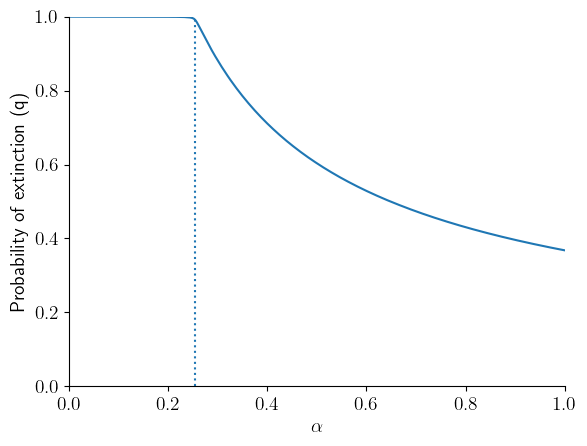

In [3]:
# 2004, I. ricinus, SA 
m = 3.928571
k = 0.6222
year = 2004
tick_species = "I. ricinus"
host_species = "SA"

R0_linspace = [alpha * m for alpha in alpha_linspace]
numerical_extinction_probability = generate_for_k(g, R0_linspace, k)

plot_figure(alpha_linspace, 1/m, numerical_extinction_probability, year, tick_species, host_species)

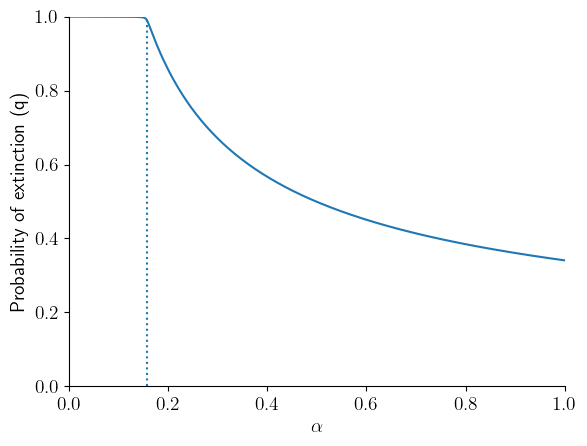

In [4]:
# 2004, I. trianguliceps, SA
m = 6.386861
k = 0.4676
year = 2004
tick_species = "I. trianguliceps"
host_species = "SA"

R0_linspace = [alpha * m for alpha in alpha_linspace]
numerical_extinction_probability = generate_for_k(g, R0_linspace, k)

plot_figure(alpha_linspace, 1/m, numerical_extinction_probability, year, tick_species, host_species)

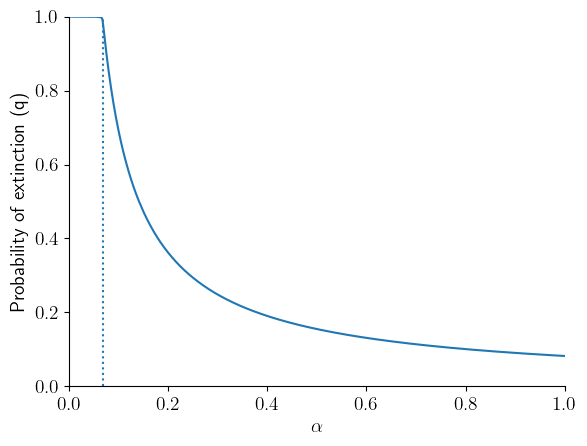

In [5]:
# 2005, I. ricinus,FV
m = 14.75
k = 0.9019
year = 2005
tick_species = "I. ricinus"
host_species = "FV"

R0_linspace = [alpha * m for alpha in alpha_linspace]
numerical_extinction_probability = generate_for_k(g, R0_linspace, k)

plot_figure(alpha_linspace, 1/m, numerical_extinction_probability, year, tick_species, host_species)

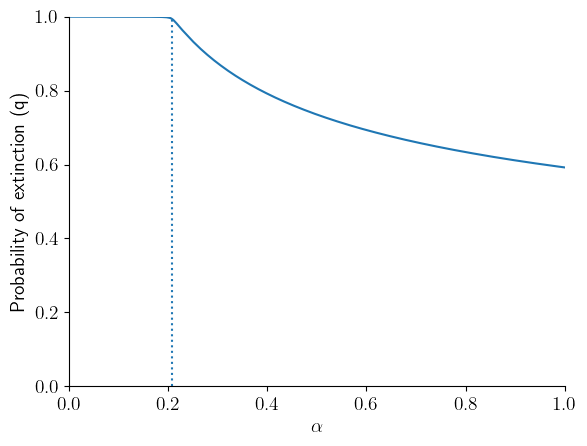

In [6]:
# 2005, I. trianguliceps, SA
m = 4.810127   
k = 0.2341
year = 2005
tick_species = "I. trianguliceps"
host_species = "SA"

R0_linspace = [alpha * m for alpha in alpha_linspace]
numerical_extinction_probability = generate_for_k(g, R0_linspace, k)

plot_figure(alpha_linspace, 1/m, numerical_extinction_probability, year, tick_species, host_species)

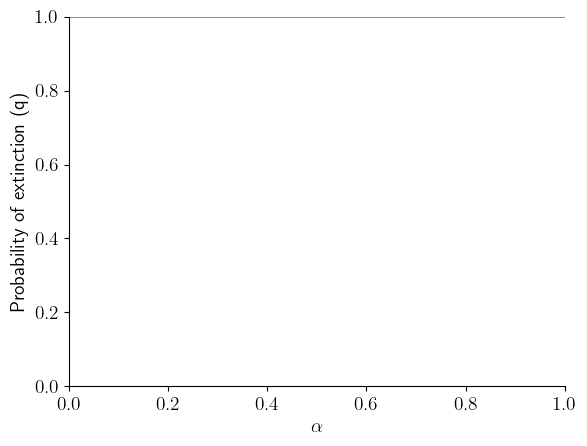

In [7]:
# 2005, I. trianguliceps, FV
m = 0.153846 # This implies R0 will always be less than 0 and extinction is guaranteed.
k = 0.6700
year = 2005
tick_species = "I. trianguliceps"
host_species = "FV"

R0_linspace = [alpha * m for alpha in alpha_linspace]
numerical_extinction_probability = generate_for_k(g, R0_linspace, k)

plot_figure(alpha_linspace, 1/m, numerical_extinction_probability, year, tick_species, host_species)

In [8]:
from math import ceil

from simulation import simulate_outbreak
from poisson_process_generator import PoissonProcessGenerator
from scale_parameters import to_shape_scale_per_alpha

# For each subset of Kielder Data, take the alpha_threshold value (value to surpass so that R0>1)
# Round it up to 3 decimal places (so that the rounded value is just above alpha threshold)
# Then calculate some equally-spaced values of alpha up to 0.8

def get_alpha_values_for_plot(m, alpha_plot_max=0.5, alpha_value_plot_count=4):
    alpha_threshold = 1/m
    alpha_span = alpha_plot_max - alpha_threshold
    alpha_delta = alpha_span/(alpha_value_plot_count - 1)
    alpha_values = []

    for i in list(range(0,alpha_value_plot_count)):
        # rounding for two reasons: the minimum alpha value should be slightly larger than the threshold needed to get R0>1
        # Rounding to 3dp means these values can be displayed in a chart
        alpha_values.append(ceil((alpha_threshold + alpha_delta*i) * 1000) / 1000)

    return alpha_values

def simulate_outbreaks_per_alpha(parameters_for_gamma_dist, k):
    simulation_data = {}
    simulation_data["reached_target_generation_counts"] = {}
    simulation_data["survival_rate"]= {}
    for alpha in parameters_for_gamma_dist.keys():
        simulation_data["reached_target_generation_counts"][alpha] = []
        
        print("simulating alpha:", alpha, "k:", k)
        
        first_outbreak_to_reach_target = None
        poisson_process_generator = PoissonProcessGenerator(shape=parameters_for_gamma_dist[alpha]["shape"],
                                                            scale=parameters_for_gamma_dist[alpha]["scale"])    
        target = 100
        max_outbreaks = 10000
        extinction_tally = 0
        
        for _ in range(0, max_outbreaks):
            outbreak = simulate_outbreak(poisson_process_generator, target)
            if outbreak["extinct"] is True:
                extinction_tally = extinction_tally + 1
            else:
                simulation_data["reached_target_generation_counts"][alpha].append(len(outbreak["history"])-1)

        simulation_data["survival_rate"][alpha] = 1 - (extinction_tally/max_outbreaks)

    return simulation_data

def plot_simulation_per_alpha(alpha_values, simulation_data, year, tick_species, host_species):
    alpha_labels = [str(alpha) for alpha in alpha_values]
    survival_rate_2dp = [round(x, 2) for x in simulation_data["survival_rate"].values()]
    fig, ax1 = plt.subplots()
    ax1.boxplot(list(simulation_data["reached_target_generation_counts"].values()), tick_labels=alpha_labels, vert=False)
    ax1.set_xlabel("Generations before a generation with 100 cases")
    ax1.set_ylabel(r'$\displaystyle \alpha $')    

    ax2 = ax1.twinx()
    ax2.set_yticks([1/8,3/8,5/8,7/8], labels=survival_rate_2dp)
    ax2.set_ylabel("Survival rate")

    plt.savefig('figs/firstGeneration100_{}_{}_{}.png'.format(year, tick_species, host_species), dpi=300, bbox_inches="tight")

simulating alpha: 0.255 k: 0.6222
simulating alpha: 0.337 k: 0.6222
simulating alpha: 0.419 k: 0.6222
simulating alpha: 0.5 k: 0.6222


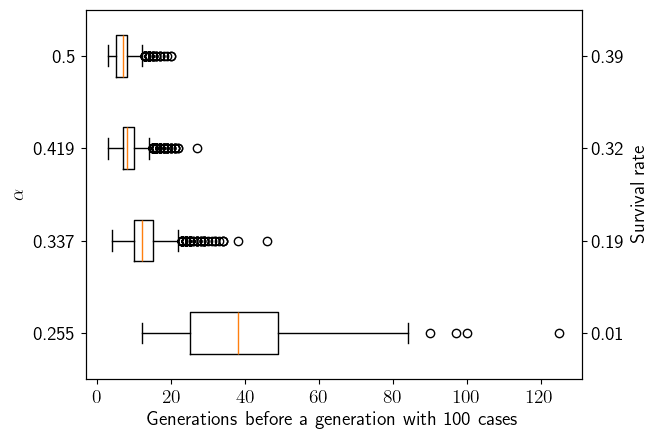

In [9]:
# 2004, I. ricinus, SA

m = 3.928571
k = 0.6222

alpha_values = get_alpha_values_for_plot(m)
parameters_for_gamma_dist = to_shape_scale_per_alpha(k, m, alpha_values) 
simulation_data = simulate_outbreaks_per_alpha(parameters_for_gamma_dist, k)

year = 2004
tick_species = "I. ricinus"
host_species = "SA"
plot_simulation_per_alpha(alpha_values, simulation_data, year, tick_species, host_species)

simulating alpha: 0.157 k: 0.4676
simulating alpha: 0.272 k: 0.4676
simulating alpha: 0.386 k: 0.4676
simulating alpha: 0.5 k: 0.4676


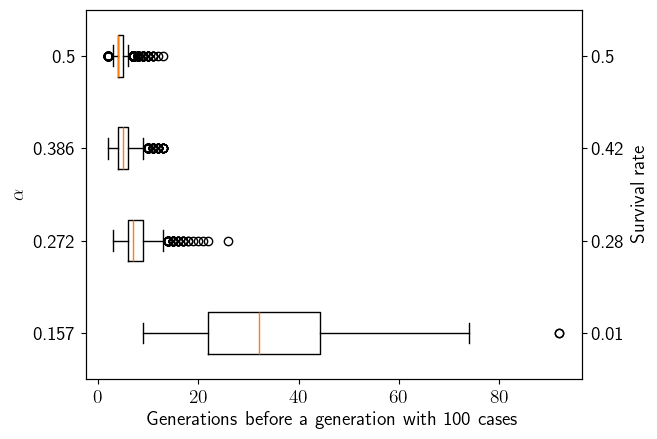

In [10]:
# 2004, I. trianguliceps, SA

m = 6.386861
k = 0.4676

alpha_values = get_alpha_values_for_plot(m)
parameters_for_gamma_dist = to_shape_scale_per_alpha(k, m, alpha_values) 
reached_target_generation_counts = simulate_outbreaks_per_alpha(parameters_for_gamma_dist, k)

year = 2004
tick_species = "I. trianguliceps"
host_species = "SA"
plot_simulation_per_alpha(alpha_values, reached_target_generation_counts, year, tick_species, host_species)

simulating alpha: 0.068 k: 0.9019
simulating alpha: 0.212 k: 0.9019
simulating alpha: 0.356 k: 0.9019
simulating alpha: 0.5 k: 0.9019


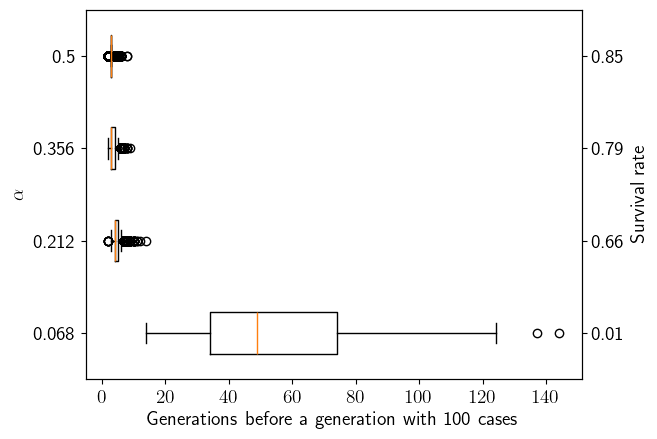

In [11]:
# 2005, I. ricinus, FV

m = 14.75
k = 0.9019

alpha_values = get_alpha_values_for_plot(m)
parameters_for_gamma_dist = to_shape_scale_per_alpha(k, m, alpha_values) 
reached_target_generation_counts = simulate_outbreaks_per_alpha(parameters_for_gamma_dist, k)

year = 2005
tick_species = "I. ricinus"
host_species = "FV"
plot_simulation_per_alpha(alpha_values, reached_target_generation_counts, year, tick_species, host_species)

simulating alpha: 0.208 k: 0.2341
simulating alpha: 0.306 k: 0.2341
simulating alpha: 0.403 k: 0.2341
simulating alpha: 0.5 k: 0.2341


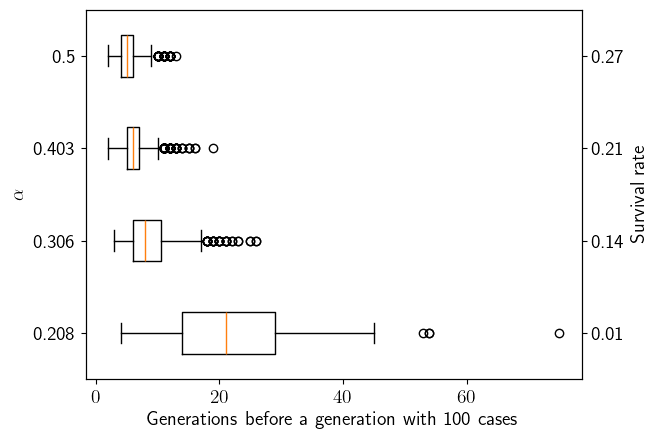

In [12]:
# 2005, I. trianguliceps, SA

m = 4.810127
k = 0.2341

alpha_values = get_alpha_values_for_plot(m)
parameters_for_gamma_dist = to_shape_scale_per_alpha(k, m, alpha_values) 
reached_target_generation_counts = simulate_outbreaks_per_alpha(parameters_for_gamma_dist, k)

year = 2005
tick_species = "I. trianguliceps"
host_species = "SA"
plot_simulation_per_alpha(alpha_values, reached_target_generation_counts, year, tick_species, host_species)

### Combined chart for fixed $ R_0 $

Now, I want to see the effect of $ k $. So we will fix $ R_0 = 1.5 $ and set $ k $ to be values found via fitting the NB distribution. This will show us the effect that each subset's dispersion parameter has, assuming that that combination of tick, pathogen and host was able to achieve $ R_0 = 1.5 $

In [13]:
k_dispersion_labels = ["0.902",
                       "0.622", 
                       "0.478",  
                       "0.234"]
k_dispersion_values = [0.902,
                       0.622,
                       0.478,
                       0.234]
data_labels = ["I. ricinus, field voles, 2005",
               "I. ricinus, common shrews, 2004",
               "I. trianguliceps, common shrews, 2004",
               "I. trianguliceps, common shrews, 2005"]

In [14]:
from scale_parameters import to_shape_scale_per_k

R0 = 1.5
parameters = to_shape_scale_per_k(k_dispersion_values, R0)

k_simulation_data = {}
k_simulation_data["extinct_generation_counts"] = {}
k_simulation_data["reached_target_generation_counts"] = {}
k_simulation_data["extinct_populations"] = {}
k_simulation_data["reached_target_populations"] = {}
k_simulation_data["first_outbreak_to_reach_target"] = {}
k_simulation_data["number_of_outbreaks_before_target_reached"] = {}
k_simulation_data["extinction_tally"] = {}
k_simulation_data["outbreaks"] = {}
k_simulation_data["survival_rate"]= {}
for k in parameters.keys():
    k_simulation_data["extinct_generation_counts"][k] = []
    k_simulation_data["reached_target_generation_counts"][k] = []
    k_simulation_data["extinct_populations"][k] = []
    k_simulation_data["reached_target_populations"][k] = []
    k_simulation_data["first_outbreak_to_reach_target"][k] = []

for k in parameters.keys():

    print("simulating R0:", R0, "k:", k)
    
    first_outbreak_to_reach_target = None
    extinction_tally = 0
    poisson_process_generator = PoissonProcessGenerator(shape=parameters[k]["shape"], scale=parameters[k]["scale"])
    
    target = 100
    max_outbreaks = 10000
    
    for j in range(1,max_outbreaks+1):

        outbreak = simulate_outbreak(poisson_process_generator, target)
        if outbreak["extinct"] is True:
            extinction_tally = extinction_tally + 1
            k_simulation_data["extinct_generation_counts"][k].append(len(outbreak["history"])-1) # First generation of 1 is gen=0
            k_simulation_data["extinct_populations"][k].append(outbreak["population"])
        else:
            k_simulation_data["reached_target_generation_counts"][k].append(len(outbreak["history"])-1)
            k_simulation_data["reached_target_populations"][k].append(outbreak["population"])
            
        if outbreak["extinct"] is False and len(k_simulation_data["first_outbreak_to_reach_target"][k]) == 0:
            k_simulation_data["first_outbreak_to_reach_target"][k] = outbreak["history"]
            k_simulation_data["number_of_outbreaks_before_target_reached"][k] = j
            
    k_simulation_data["extinction_tally"][k] = extinction_tally
    k_simulation_data["outbreaks"][k] = max_outbreaks
    k_simulation_data["survival_rate"][k] = 1 - (extinction_tally/max_outbreaks)

simulating R0: 1.5 k: 0.902
simulating R0: 1.5 k: 0.622
simulating R0: 1.5 k: 0.478
simulating R0: 1.5 k: 0.234


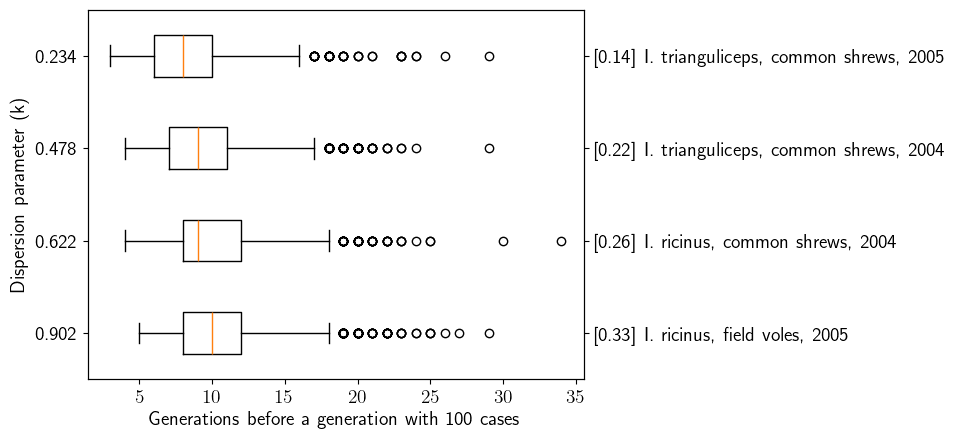

In [15]:
display_labels = []
for survival_rate, data_label in zip(k_simulation_data["survival_rate"].values(), data_labels):
    display_labels.append("[{}] {}".format(round(survival_rate, 2), data_label))

fig, ax1 = plt.subplots()
ax1.boxplot(list(k_simulation_data["reached_target_generation_counts"].values()), tick_labels=k_dispersion_labels, vert=False)
ax1.set_xlabel("Generations before a generation with 100 cases")
ax1.set_ylabel("Dispersion parameter (k)")
ax2 = ax1.twinx()
ax2.set_yticks([1/8,3/8,5/8,7/8], labels=display_labels)
#plt.set_title("c")
#plt.show()
plt.savefig('figs/allCombinations_firstGenerationReach100Offspring.png', dpi=300, bbox_inches="tight")

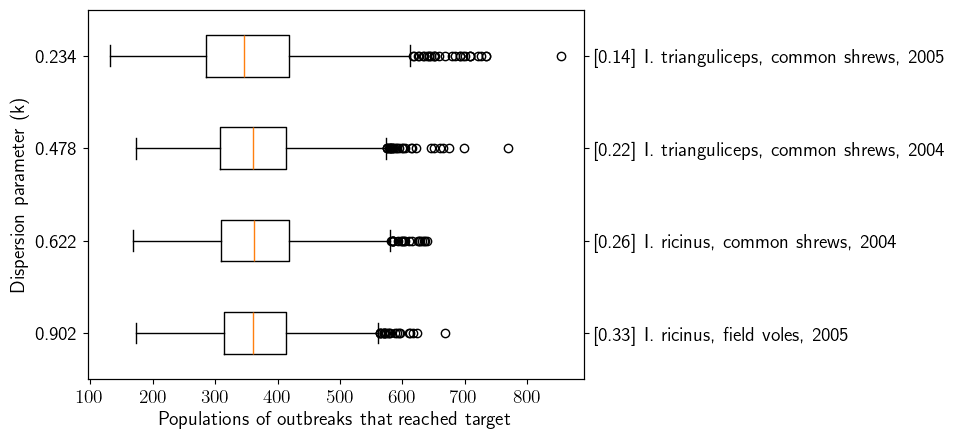

In [16]:
fig, ax1 = plt.subplots()
plt.boxplot(list(k_simulation_data["reached_target_populations"].values()), tick_labels=k_dispersion_labels, vert=False)
ax1.set_xlabel("Populations of outbreaks that reached target")
ax1.set_ylabel("Dispersion parameter (k)")
ax2 = ax1.twinx()
ax2.set_yticks([1/8,3/8,5/8,7/8], labels=display_labels)
#plt.set_title("c")
#plt.show()
plt.savefig('figs/allCombinations_populationsOfOutbreaksThatReachTarget.png', dpi=300, bbox_inches="tight")

3.0066686425607587
3.0001344447432103
3.169070306464074
3.110994642441183


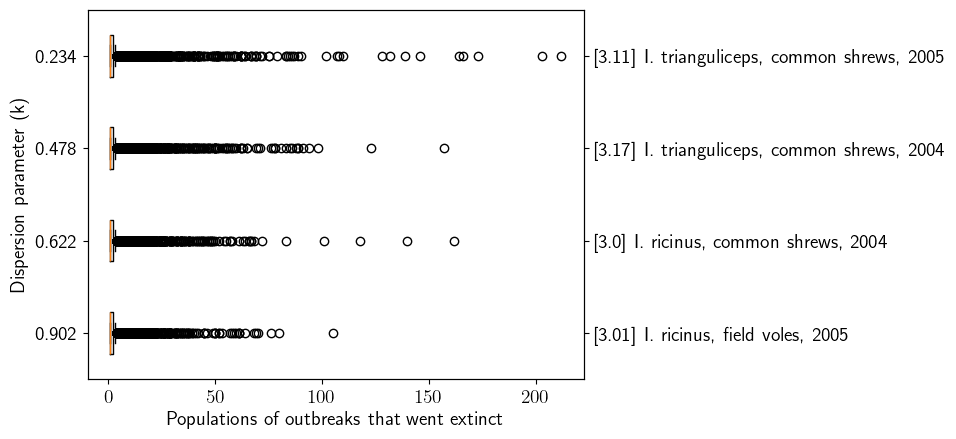

In [17]:
def mean(seq):
    return sum(seq)/len(seq)

display_labels = []
for extinct_population, data_label in zip(k_simulation_data["extinct_populations"].values(), data_labels):
    print(mean(extinct_population))
    display_labels.append("[{}] {}".format(round(mean(extinct_population), 2), data_label))

fig, ax1 = plt.subplots()
plt.boxplot(list(k_simulation_data["extinct_populations"].values()), tick_labels=k_dispersion_labels, vert=False)
ax1.set_xlabel("Populations of outbreaks that went extinct")
ax1.set_ylabel("Dispersion parameter (k)")
ax2 = ax1.twinx()
ax2.set_yticks([1/8,3/8,5/8,7/8], labels=display_labels)
#plt.set_title("c")
#plt.show()
plt.savefig('figs/allCombinations_populationsOfOutbreaksThatWentExtinct.png', dpi=300, bbox_inches="tight")